<a href="https://colab.research.google.com/github/smmurdock/Learn-TensorFlow/blob/main/01_neural_network_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with TensorFlow

**Example Regression Problems:**

* How much will this house sell for?
* How many people will buy this app?
* How much will my health insurance be?
* How much should I save each week for fuel?

**What we're going to cover:**

* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model (features and labels)
* Creating custom data to view and fit
* Steps in modeling
  * Creating a model
  * Compiling a model
  * Fitting a model
  * Evaluating a model
* Different evaluation methods
* Saving and loading models

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


## Creating data to view and fit

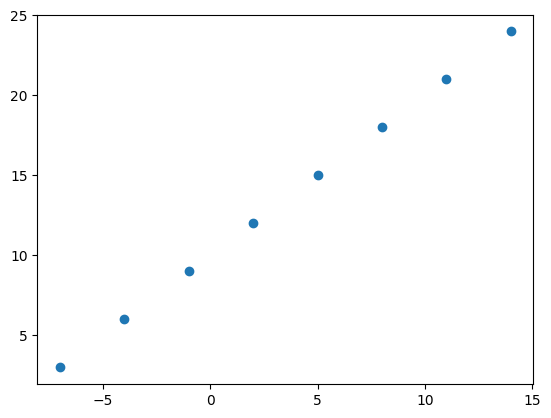

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# # Turn our NumPy arrays into tensors with dtype float32
# X = tf.constant(X)
# y = tf.constant(y)
# X, y

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

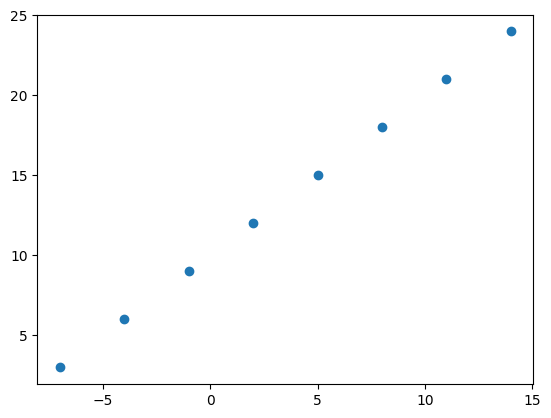

In [13]:
plt.scatter(X, y);

## Steps in Modeling with TensorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a neural network (if using a deep learning model).
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step - loss: 19.9145 - mae: 19.9145
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 19.6332 - mae: 19.6332
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 19.3520 - mae: 19.3520
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 19.0707 - mae: 19.0707
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 18.7895 - mae: 18.7895


In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[-18.699219]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increasing the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

### Revised Steps in Modeling with TensorFlow
1. Construct or import a pretrained model relevant to your problem.
2. Compile the model (prepare it to be used with data)
  - **Loss** - how wrong your model's predictions are compared to the truth labels (you want to minimize this).
  - **Optimizer** - how your model should update its internal patterns to better its predictions.
  - **Metrics** - human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns.
  - **Epochs** - how many times the model will go through all of the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)

In [17]:
# Let's rebuild our model

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - loss: 9.9449 - mae: 9.9449
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.8124 - mae: 9.8124
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.6799 - mae: 9.6799
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.5474 - mae: 9.5474
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.4149 - mae: 9.4149
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.2824 - mae: 9.2824
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.1499 - mae: 9.1499
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.0174 - mae: 9.0174
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.8849 - mae: 8.8849
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.7524 - mae: 8.7524
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 8.6199 - mae: 8.6199
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.4874 - mae: 8.4874
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/st

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


array([[29.96739]], dtype=float32)

In [20]:
# Exercise: Select and use one hyperparameter from the example model on the
# slide to modify and test with our existing model

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # change made here
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 12.1469 - mae: 12.1469
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 11.5307 - mae: 11.5307
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.9013 - mae: 10.9013
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.2593 - mae: 10.2593
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.6017 - mae: 9.6017
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.9054 - mae: 8.9054
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.1688 - mae: 8.1688
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.3894 - mae: 7.3894
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6.5582 - mae: 6.5582
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.6692 - mae: 5.6692
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 4.7179 - mae: 4.7179
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 4.1855 - mae: 4.1855
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4

In [21]:
# Let's see if our model's prediction has improved
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[31.88259]], dtype=float32)

In [25]:
# Exercise: Select and use one hyperparameter from the example model on the
# slide to modify and test with our existing model

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # change made here
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step - loss: 13.3089 - mae: 13.3089
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.5663 - mae: 12.5663
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.8249 - mae: 11.8249
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.0821 - mae: 11.0821
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.3360 - mae: 10.3360
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.5846 - mae: 9.5846
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.8258 - mae: 8.8258
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.0575 - mae: 8.0575
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.2779 - mae: 7.2779
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6.8062 - mae: 6.8062
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.0017 - mae: 7.0017
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.2955 - mae: 7.2955
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:
# Let's see if our model's prediction has improved
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[26.840305]], dtype=float32)

## Evaluating a model